In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:

n = 10



def temte(x,y,P):
  tempe = P[0]+P[1]*x+P[2]*y+P[3]*x*y
  return tempe 


temte(-1,1,np.ones(4))


0.0

In [45]:
position = np.zeros((4,2))
position[0,0] = 1
position[0,1] = 1
position[1,0] = -1
position[1,1] = 1
position[2,0] = -1
position[2,1] = -1
position[3,0] = 1
position[3,1] = -1

position
x = position[:,0]
y = position[:,1]
unos = np.ones(4)
coef = np.array([
    unos,
     x,
     y,
     x*y])

coef

temp = [1,2,0.5,0.3]

inv_coef = np.linalg.inv(coef)
inv_coef

mult = temp@inv_coef
mult

temte(0,0.5,mult)

1.225

In [46]:
#Condiciones de frontera

P1 = temte(1,1,mult)
P2 = temte(-1,1,mult)
P3 = temte(1,-1,mult)
P4 = temte(-1,-1,mult)
P1, P2, P3, P4

(1.0, 2.0, 0.2999999999999998, 0.5)

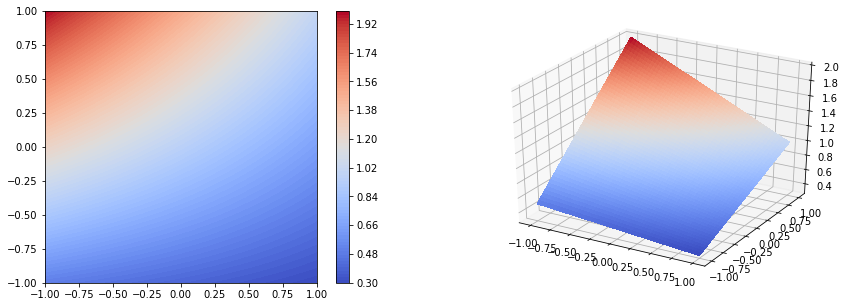

In [47]:
from matplotlib.projections import Axes3D
X= np.linspace(-1,1,100)
Y= np.copy(X)
xs, ys = np.meshgrid(X,Y, sparse=True)
zs = temte(xs,ys,mult)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
h = plt.contourf(X, Y, zs,100,cmap = "coolwarm")
plt.axis('scaled')
plt.colorbar()
ax1 = fig.add_subplot(1,2,2,projection='3d')
surf = ax1.plot_surface(xs, ys, zs, cmap="coolwarm",
                       linewidth=2, antialiased=False)
plt.show()



In [48]:
def rotate(theta,x,y):
  n= len(x)-1
  rot= np.zeros((2,4))

  for i in range(n):
      rot= np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])@np.array([[x[i]],[y[i]]])
  return np.transpose(rot)

x= np.array([1,-1,-1,1])
y= np.array([1,1,-1,-1])
theta= 2*np.pi
rotate(theta,x,y)



array([[-1., -1.]])

In [49]:
theta=np.pi
temte(np.sin(theta)/2,np.cos(theta)/2,mult)

0.6749999999999999

In [50]:
def rotate(theta,x,y):
  rot= np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])@np.array([x,y])
  return rot

x= np.array([1,-1,-1,1])
y= np.array([1,1,-1,-1])
theta0= np.pi/2
yr,xr=rotate(theta,x,y)
xr

array([-1., -1.,  1.,  1.])

In [32]:
temte(xr,yr,mult)

array([0.5, 2. , 1. , 0.3])

In [51]:
theta=np.linspace(0,2*np.pi,200)



In [110]:
xi=[]
yi=[]
for i in theta:
  y,x=rotate(i,0,0.5)
  xi.append(x)
  yi.append(y)

xr=np.array(xi)
yr=np.array(yi)
zr=temte(xr,yr,mult)




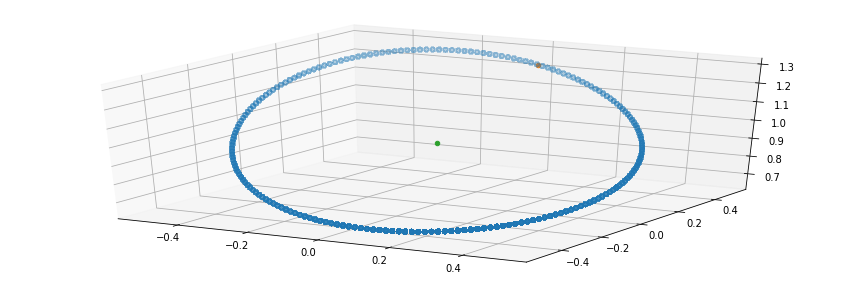

In [109]:
xg, yg = np.meshgrid(xr,yr,sparse=True)
fig = plt.figure(figsize=(15,5))
grafica=fig.add_subplot(111, projection='3d')
surf = grafica.scatter(xg, yg, zr,
                       linewidth=1, antialiased=False)

grafica.scatter(0,0.5,1.225)
grafica.scatter(0,0,0.95)

